<a href="https://colab.research.google.com/github/aayushi-29/VCET-DS/blob/main/Data_Engineering(Wine_Quality).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#pd is an Alias

#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

df=pd.read_csv("winequalityN.csv")

#Preparing X and Y

X = df.drop('type', axis=1)
X = X.drop('quality', axis=1)
Y = df['quality']
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
# Feature Selection 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Impute missing values (replace NaNs)
imputer = SimpleImputer(strategy='mean')  # Replace with your desired strategy
X_imputed = imputer.fit_transform(X)

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_imputed, Y)  # Use the imputed data
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

                   Specs        Score
0          fixed acidity    11.133107
1       volatile acidity    42.573553
2            citric acid     3.690176
3         residual sugar   224.945652
4              chlorides     6.388241
5    free sulfur dioxide   913.332832
6   total sulfur dioxide  1269.974108
7                density     0.006600
8                     pH     0.096622
9              sulphates     1.090422
10               alcohol   201.369195


[0.07772808 0.10012247 0.08219669 0.08504296 0.08193185 0.08638954
 0.08654035 0.09549657 0.08204917 0.08578618 0.13671613]


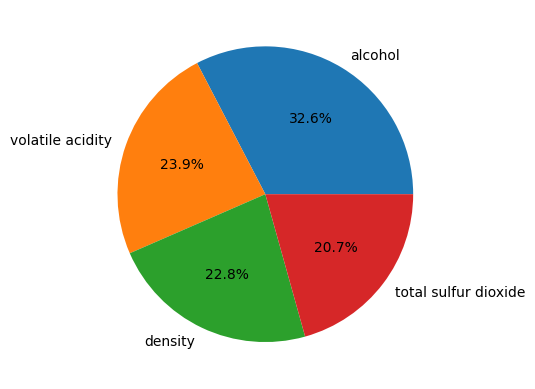

In [ ]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame handling
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical variables

model = ExtraTreesClassifier()

# Assuming X contains categorical features, encode them using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform) # Apply LabelEncoder to all columns in X

model.fit(X_encoded,Y) # Fit the model with encoded features
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_encoded.columns) # Use encoded column names
feat_importance.nlargest(4).plot(kind='pie', autopct='%1.1f%%')
#plot(kind='box')
# plot(kind='area')
# plot(kind='line', marker='o')
plt.show()

In [ ]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder


df['fixed acidity']=pd.cut(df['fixed acidity'],3,labels=['0','1','2'])
df['volatile acidity']=pd.cut(df['volatile acidity'],3,labels=['0','1','2'])
df['citric acid']=pd.cut(df['citric acid'],3,labels=['0','1','2'])
df['residual sugar']=pd.cut(df['residual sugar'],3,labels=['0','1','2'])

print(df)

X = df.drop('type', axis=1)
X = X.drop('quality', axis=1)
Y = df['quality']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)


       type fixed acidity volatile acidity citric acid residual sugar  \
0     white             0                0           0              0   
1     white             0                0           0              0   
2     white             1                0           0              0   
3     white             0                0           0              0   
4     white             0                0           0              0   
...     ...           ...              ...         ...            ...   
6492    red             0                1           0              0   
6493    red             0                0           0              0   
6494    red             0                0           0              0   
6495    red             0                1           0              0   
6496    red             0                0           0              0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0          

In [ ]:
#Categorical to Numerical
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

[3 3 3 ... 3 2 3]


In [ ]:
#Dealing with missing values

print(df.isnull().sum())

# If there are missing values in numerical columns like 'fixed acidity', you can impute them:
# df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)  # This line causes the error
# Instead of calculating the mean on categorical data, you might want to use mode to fill missing values:
df['fixed acidity'].fillna(df['fixed acidity'].mode()[0], inplace=True)

# If there are missing values in categorical columns like 'Species', you can impute them:
df['quality'].fillna(df['quality'].mode()[0], inplace=True)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [ ]:
import pandas as pd

# Sample DataFrame (you can replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv') # If reading from a CSV file

# Print the count of missing values for each column
print("Missing values count before imputation:")
print(df.isnull().sum())

# Check if 'Item_Weight' is in the DataFrame columns
if 'Item_Weight' in df.columns:
    # Imputing numerical values (choose one method: mean, median, or mode)
    # Method: Mean
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
else:
    print("Column 'Item_Weight' not found in the DataFrame.")

# Similarly, check if 'Outlet_Size' exists before imputing
if 'Outlet_Size' in df.columns:
    # Imputing categorical values with a specific value, e.g., 'Medium'
    df['Outlet_Size'].fillna('Medium', inplace=True)
else:
    print("Column 'Outlet_Size' not found in the DataFrame.")

# Print the count of missing values after imputation
print("Missing values count after imputation:")
print(df.isnull().sum())

Missing values count before imputation:
type                    0
fixed acidity           0
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64
Column 'Item_Weight' not found in the DataFrame.
Column 'Outlet_Size' not found in the DataFrame.
Missing values count after imputation:
type                    0
fixed acidity           0
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#Oversampling and Under Sampling

#a = (df['Species'] == 'Iris-setosa').sum()
#print(a)
print(df.isnull().sum())
df['fixed acidity'].fillna(df['fixed acidity'].mode()[0], inplace=True)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
# Fill any remaining NaNs in the entire DataFrame X before applying SMOTE
X = X.fillna(X.mode().iloc[0]) # Fill NaNs with the mode of each column
X, Y=sms.fit_resample(X,Y) # Now X should not contain NaNs

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

type                    0
fixed acidity           0
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64
Counter({3: 2836, 2: 2836, 4: 2836, 5: 2836, 1: 2836, 0: 2836, 6: 2836})
Counter({3: 2836, 2: 2836, 4: 2836, 5: 2836, 1: 2836, 0: 2836, 6: 2836})


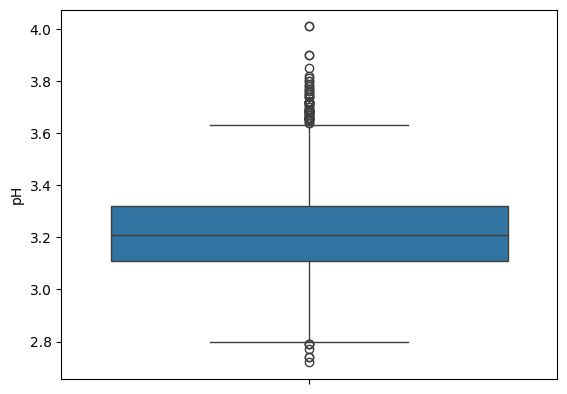

In [ ]:
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['pH'])
plt.show()

In [ ]:
#Dealing with Outliers using Interquantile Range

# Convert 'fixed acidity' to numeric, coercing errors to NaN
df['fixed acidity'] = pd.to_numeric(df['fixed acidity'], errors='coerce')

# Drop rows with NaN in 'fixed acidity' if needed
df.dropna(subset=['fixed acidity'], inplace=True)

print(df['fixed acidity'])
Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['fixed acidity'] < lower].values
out2=df[df['fixed acidity'] > upper].values

df['fixed acidity'].replace(out1,lower,inplace=True)
df['fixed acidity'].replace(out2,upper,inplace=True)

print(df['fixed acidity'])

0       0
1       0
2       1
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: fixed acidity, Length: 6497, dtype: int64
0.0
0.0
0.0
0       0
1       0
2       1
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: fixed acidity, Length: 6497, dtype: int64


In [ ]:
import pandas as pd

# Sample DataFrame (you can replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv') # If reading from a CSV file

# Ensure 'fixed acidity' is numeric
df['fixed acidity'] = pd.to_numeric(df['fixed acidity'], errors='coerce')

# Specify the column name you want to print
print(df['fixed acidity']) # Replace 'fixed acidity' with the actual column name

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1
print("IQR:", IQR)

# Determine upper and lower bounds for outliers
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print("Upper bound:", upper)
print("Lower bound:", lower)

# Identify outliers
out1 = df['fixed acidity'] < lower
out2 = df['fixed acidity'] > upper

# Replace outliers with respective bounds
df.loc[out1, 'fixed acidity'] = lower
df.loc[out2, 'fixed acidity'] = upper

print(df['fixed acidity'])

0       0
1       0
2       1
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: fixed acidity, Length: 6497, dtype: int64
IQR: 0.0
Upper bound: 0.0
Lower bound: 0.0
0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: fixed acidity, Length: 6497, dtype: int64


In [38]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('type', axis=1)
X = X.drop('quality', axis=1)
Y = df['quality']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace 'mean' with your desired strategy
X = imputer.fit_transform(X) # Fit and transform to impute NaNs

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))

[[ 56.13976643   1.56578978]
 [ 12.0108226  -19.83176033]
 [-18.35763601   3.81086045]
 ...
 [-74.05560409  15.98706743]
 [-69.46908699  17.98130355]
 [-74.64664264   4.8223578 ]]
Accuracy: 0.4256410256410256


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
